In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from os import linesep as endl
from scipy import signal
from scipy.signal import iirfilter, sosfiltfilt
import scipy.fftpack
from scipy.integrate import simps
import csv
from scipy.interpolate import griddata

In [2]:
conda install -c conda-forge eofs

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jackl\Anaconda3

  added / updated specs:
    - eofs


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py37haa95532_0 --> conda-forge::conda-4.9.2-py37h03978a9_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [8]:
datContent = [i.strip().split() for i in open("AllStations_temperature_h_2019/AllStations_temperature_h_2019.dat").readlines()]
with open("AllStations_temperature_h_2019/AllStations_temperature_h_2019.csv", "wt") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

In [2]:
data = pd.read_csv('AllStations_temperature_h_2019/AllStations_temperature_h_2019.csv', header=None)

#rename first column and first 2 rows to make data more readable
data.rename(columns={0: "Timestamp"},inplace=True)
data.rename(index={0: "Longitude", 1: "Latitude"},inplace=True)

#rescale the timestamp data for readability
offset = datetime(1970, 1, 1).toordinal() + 366  
good_timestamp = pd.to_datetime(data['Timestamp'] - offset, unit='D')
data['Timestamp'] = good_timestamp

In [3]:
# Drawing the coastline 
coast = np.loadtxt('Coast.dat')

coast_lon = []
coast_lat = []

for i in range(0,len(coast)):
    coast_lon.append(coast[i][0])
    coast_lat.append(coast[i][1])

mid = coast_lat[int(len(coast)/2)]

rad = (mid * np.pi) / 180
ratio = np.cos(rad)
inverse = 1/ratio

data_list = data.values.tolist()
station_lon = data_list[0]
station_lat = data_list[1]
station_lon = station_lon[1:]
station_lat = station_lat[1:]

for i in range(0,len(station_lon)):
    station_lon[i] = -180 + (station_lon[i] - 180)

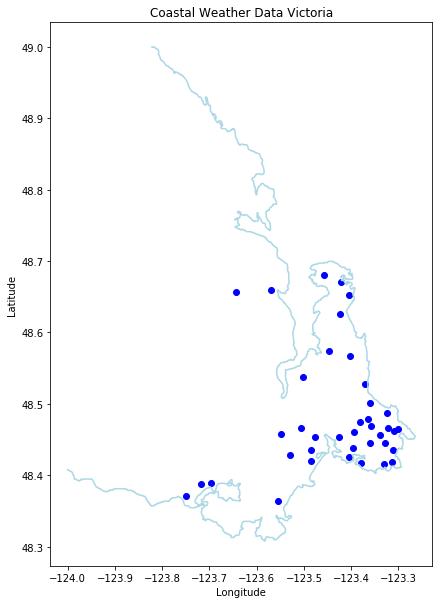

In [4]:
plt.figure(figsize=(10,10)) #fig size same as before
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(inverse) #sets the height to width ratio to 1.5. 

plt.plot(coast_lon,coast_lat,color="lightblue")
plt.scatter(station_lon,station_lat,color="blue")
plt.title('Coastal Weather Data Victoria')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [22]:
station_lon = np.array(station_lon)
station_lat = np.array(station_lat)
station_loc = np.vstack((station_lon,station_lat)).T

In [18]:
import eofs
from eofs.standard import Eof
solver = Eof(station_loc)



In [21]:
solved_eofs = solver.eofs()
variance_fractions = solver.varianceFraction()


array([0.64560773, 0.35439227])